In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.casedeck import*
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *
# from hermes3.balance1d import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


# 2D I/O

In [2]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m7a-base_from_m6c_BASELINE1', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases')

case = db.load_case_2D("m7a-base_from_m6c_BASELINE1", use_squash = True, verbose = True)

case_2d_geom = case.ds.hermes.extract_2d_tokamak_geometry()



- Reading case m7a-base_from_m6c_BASELINE1
-----------------------
- Looking for squash file
- Squash file found. squash date 02/26/2025, 18:53:30, dmp file date 02/26/2025, 18:29:29

Unnormalising with xHermes


In [3]:

print(case_2d_geom.data_vars)

Data variables:
    Bxy                 (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    Dnnd                (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Ed+_iz              (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Ed+_rec             (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Ed_pump             (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Ed_target_recycle   (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Ed_target_refl      (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Ed_wall_recycle     (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Ed_wall_refl        (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
    Edd+_cx             (t, x, theta) float64 dask.array<chunksize=(23, 40, 108), meta=np.ndarray>
 

In [4]:
params = ['dv', 'dl', 'dx', 'dz']

profile_geom = get_1d_poloidal_data(case_2d_geom, params,region = ('outer_lower'), sepadd = 1)

# print(profile_geom)

1 None


# 1D I/O

In [5]:
case_1d = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/02_eflow_da/m4ab-tune_albedo_1D_sep_add_1_case_03_apply_flux_expansion_source_factor').isel(t=-1)

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [6]:
case_1d = case_1d.hermes.extract_1d_tokamak_geometry()


for item in case_1d.data_vars:
    # print(case.ds[item].)attrs
    print(case_1d[item])
    print('-------------------------------------------')

<xarray.DataArray 'Bxy' (pos: 400)>
dask.array<getitem, shape=(400,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
    dx       (pos) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    dy       (pos) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    dz       (pos) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    t        float64 0.01399
    x        int64 0
    y        (pos) float64 0.05792 0.1736 0.289 0.4042 ... 24.4 24.41 24.41
    z        float64 3.142
  * pos      (pos) float64 -0.1734 -0.05771 0.05771 0.1729 ... 24.17 24.17 24.18
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    metadata:       {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.51425755...
    options:        IncIntShear = false\t\t# type: bool, source: default\nMXG...
    geometry:       
-------------------------------------------
<xarray.DataArray 'Ed+_iz' (pos: 400)>
dask.array<

# ------------------------

In [7]:
# print(case.ds.data_vars)

for item in case.ds.data_vars:
    # print(case.ds[item].)attrs
    print(case.ds[item])
    print('-------------------------------------------')

<xarray.DataArray 'Bxy' (x: 40, theta: 108)>
dask.array<open_dataset-1f894040de80ee3e09e1286040bc4321Bxy, shape=(40, 108), dtype=float64, chunksize=(40, 108), chunktype=numpy.ndarray>
Coordinates: (12/23)
    dx                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    zShift                   (x, theta) float64 dask.array<chunksize=(40, 108), meta=np.ndarray>
    psi_poloidal             (x, theta) float64 -0.001427 -0.001427 ... 0.00634
    R                        (x, theta) float64 0.3369 0.348 ... 1.513 1.524
    ...                       ...
    Zxy_upper_left_corners   (x, theta) float64 -1.287 -1.279 ... -1.723 -1.725
    Zxy_upper_right_corners  (x, theta) float64 -1.286 -1.277 ... -1.696 -1.698
  * x                        (x) int64 0 1 2 3 4 5 6 7 .

In [8]:
params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle']
          
# ion_terms = ['Sd+_iz', 'Sd+_rec', 'Sd+_sheath']
# neut_terms = ['Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle']



# for sep add 1
profile_minus1 = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 1)
profile = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 6)
profile_plus1 = get_1d_poloidal_data(case.ds.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 3)

1 None
6 None
3 None


# Geometry

## 2D

In [9]:
dx_conv = case.ds['dx'].conversion

da_yface = profile['dx']*profile['dz']*profile['J']/np.sqrt(profile['g_22'])

# print('da_yface',da_yface)

# print('da_mike', profile_geom['dpar'])

da_xface = profile['dy']*profile['dz'] # Needs to be dy*dz! 

dv = profile_geom['dv']

# dv_1d = case_1d['dx']*case_1d['dz']*case_1d['dy']*case_1d['J']


# print('1D_volume', case_1d['dv'].values)
# print('1D area', case_1d['da'].values)
# print('1d_dv', dv_1d.values)
# print('2D_volume', dv.values)



xpoint_ind = np.argmin(profile['R'])
xpoint_loc = profile['Spar'][xpoint_ind]

## 1D

In [10]:
# need to account for flux expansion scaling not being included in the input source line
# source = (power_flux*2/3 / (mesh:length_xpt))*H(mesh:y_xpt - y)  # This does not account for flux expansion in 1D so specified power flux at the xpoint will be incorrect

q_e_input_1d = 1.25e7
q_e_output_1d = case_1d['efe_tot_ylow']/case_1d['da']

# print(f'{q_e_output_1d*1e-7}')

q_scaling = q_e_input_1d/np.max(q_e_output_1d)

print('q_scaling_due_to_J = ',q_scaling.values)


q_scaling_due_to_J =  1.0236706555485713


# 2D inputs



0 None
(sol_ring_0) ion/electron xpoint heatflux ratio 0.239967745503597
(sol_ring_0) electron heat flux at xpoint 1.26e+07
(sol_ring_0) plasma density upstream 1.6142463747311178e+18
(sol_ring_0) detachment_location 6.131199520316095 index 23 value 2.3061969139032708
(sol_ring_0) xpoint location 10.746271027433817
(sol_ring_0) target length 25.231911609744664
1 None
(sol_ring_1) ion/electron xpoint heatflux ratio 0.3367151635421628
(sol_ring_1) electron heat flux at xpoint 1.22e+07
(sol_ring_1) plasma density upstream 1.5976171365831823e+18
(sol_ring_1) detachment_location 6.108281285432589 index 23 value 2.338738499900773
(sol_ring_1) xpoint location 10.746271027433817
(sol_ring_1) target length 24.414827539324886
2 None
(sol_ring_2) ion/electron xpoint heatflux ratio 0.39487487910522207
(sol_ring_2) electron heat flux at xpoint 1.11e+07
(sol_ring_2) plasma density upstream 1.579841731699735e+18
(sol_ring_2) detachment_location 6.084658414573656 index 23 value 2.3681302993102054
(sol

Text(0, 0.5, 'Detachment front location (m)')

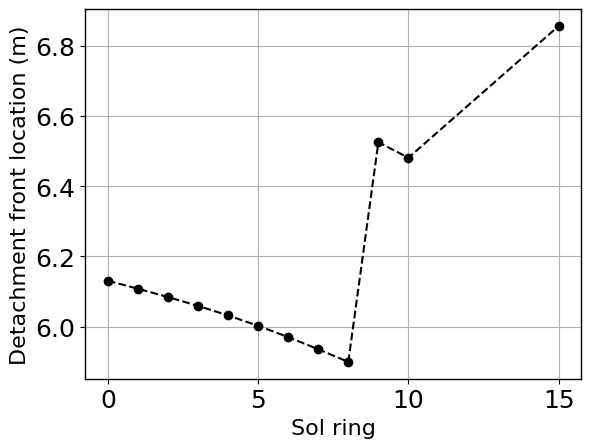

In [11]:
sol_rings = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,15]
det_locs = []

for j in sol_rings:
    profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = j)
    da_yface = profile['dx']*profile['dz']*profile['J']/np.sqrt(profile['g_22'])

    for i in ['e', 'd+']:

        profile[f'hflx{i}_tot_ylow'] = profile[f'ef{i}_tot_ylow']/da_yface
        

        profile_minus1[f'hflx{i}_tot_xlow'] = profile_minus1[f'ef{i}_tot_xlow']/da_xface
        profile[f'hflx{i}_tot_xlow'] = profile[f'ef{i}_tot_xlow']/da_xface
        profile_plus1[f'hflx{i}_tot_xlow'] = profile_plus1[f'ef{i}_tot_xlow']/da_xface

    # print(ratio between electron and ion heatflux at xpoint)

    for index, value in enumerate(profile['Te']):
        if value < 5:
            detachment_front_location = profile['Spar'].values[-1] - profile['Spar'][index]
            # print(f"Detachment front: Index {index}, Value {value} eV")
            break  

    det_locs.append(detachment_front_location)

    print(f'(sol_ring_{j}) ion/electron xpoint heatflux ratio',profile['hflxd+_tot_ylow'][xpoint_ind]/profile['hflxe_tot_ylow'][xpoint_ind])

    electron_heat_flux = profile['hflxe_tot_ylow'][xpoint_ind]
    print(f'(sol_ring_{j}) electron heat flux at xpoint', f'{electron_heat_flux:.2e}')

    print(f'(sol_ring_{j}) plasma density upstream', profile['Ne'].values[2])

    print(f'(sol_ring_{j}) detachment_location', detachment_front_location, f'index {index}', f'value {value}')

    print(f'(sol_ring_{j}) xpoint location', xpoint_loc)
    print(f'(sol_ring_{j}) target length', np.max(profile['Spar']))

fig, ax = plt.subplots()

ax.plot(sol_rings, det_locs, marker = 'o', linestyle = '--', color = 'black', label = 'Detachment front location')

ax.set_xlabel('Sol ring')
ax.set_ylabel('Detachment front location (m)')

# Heat flux balance

2 None


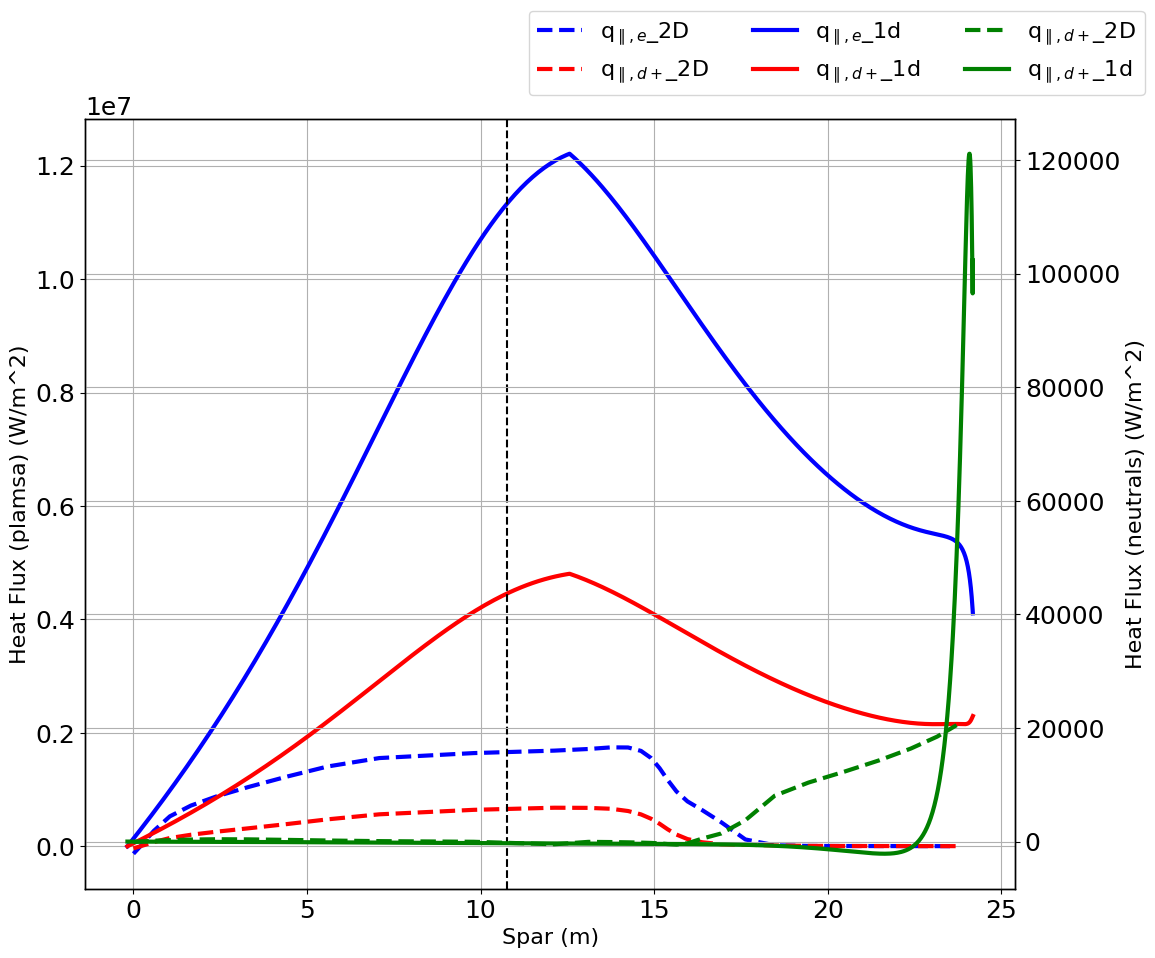

In [12]:
profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = 2)

for i in ['e', 'd+']:

    profile[f'hflx{i}_tot_ylow'] = profile[f'ef{i}_tot_ylow']/da_yface

    profile_minus1[f'hflx{i}_tot_xlow'] = profile_minus1[f'ef{i}_tot_xlow']/da_xface
    profile[f'hflx{i}_tot_xlow'] = profile[f'ef{i}_tot_xlow']/da_xface
    profile_plus1[f'hflx{i}_tot_xlow'] = profile_plus1[f'ef{i}_tot_xlow']/da_xface




# print(profile['hflxd+_tot_ylow'][xpoint_ind]/profile['hflxe_tot_ylow'][xpoint_ind])

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax2 = ax.twinx()

para_neut_adv = profile['efd_adv_par_ylow']/da_yface
para_neut_cond = profile['efd_cond_par_ylow']/da_yface
para_neut_tot = para_neut_cond + para_neut_adv

ax.plot(profile['Spar'], profile['hflxe_tot_ylow'], label = r'q$_{\parallel,e}$_2D', linewidth = linewidth, color = 'b', linestyle = '--')
ax.plot(profile['Spar'], profile['hflxd+_tot_ylow'], label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'r', linestyle = '--')
ax2.plot(profile['Spar'], para_neut_tot, label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'g', linestyle = '--')

ax.plot(case_1d['pos'], case_1d['efe_tot_ylow']/case_1d['da'], label = r'q$_{\parallel,e}$_1d', linewidth = linewidth, color = 'b')
ax.plot(case_1d['pos'], case_1d['efd+_tot_ylow']/case_1d['da'], label = r'q$_{\parallel,d+}$_1d', linewidth = linewidth, color = 'r')
ax2.plot(case_1d['pos'], case_1d['efd_tot_ylow']/case_1d['da'], label = r'q$_{\parallel,d+}$_1d', linewidth = linewidth, color = 'g')


# ax2.plot(profile['Spar'], profile['hflxe_tot_xlow'], label = 'X low', linewidth = linewidth, linestyle = '--')
ax.axvline(xpoint_loc, color = 'black', linestyle = '--')

# ax.set_yscale('log')

ax.set_xlabel('Spar (m)')
ax.set_ylabel('Heat Flux (plamsa) (W/m^2)')
ax2.set_ylabel('Heat Flux (neutrals) (W/m^2)')
# ax2.legend(loc = 'upper right')
# ax.legend(loc ='upper left')
fig.legend(ncols = 3, loc = 'upper right')
    

0.394874879105222


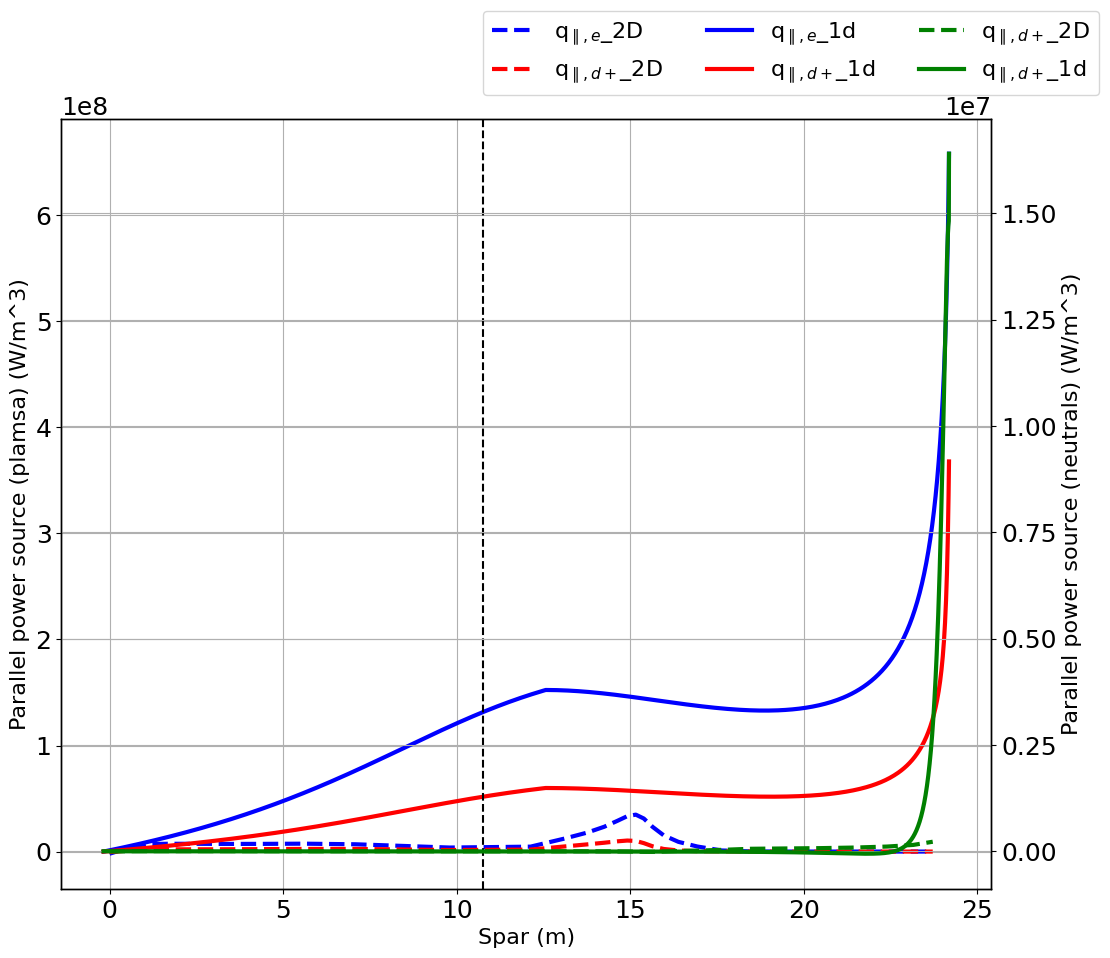

In [13]:
for i in ['e', 'd+']:

    profile[f'hflx{i}_tot_ylow'] = profile[f'ef{i}_tot_ylow']/dv

print(profile['hflxd+_tot_ylow'][xpoint_ind]/profile['hflxe_tot_ylow'][xpoint_ind])

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax2 = ax.twinx()

para_neut_adv = profile['efd_adv_par_ylow']/dv
para_neut_cond = profile['efd_cond_par_ylow']/dv
para_neut_tot = para_neut_cond + para_neut_adv

ax.plot(profile['Spar'], profile['hflxe_tot_ylow'], label = r'q$_{\parallel,e}$_2D', linewidth = linewidth, color = 'b', linestyle = '--')
ax.plot(profile['Spar'], profile['hflxd+_tot_ylow'], label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'r', linestyle = '--')
ax2.plot(profile['Spar'], para_neut_tot, label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'g', linestyle = '--')

ax.plot(case_1d['pos'], case_1d['efe_tot_ylow']/case_1d['dv'], label = r'q$_{\parallel,e}$_1d', linewidth = linewidth, color = 'b')
ax.plot(case_1d['pos'], case_1d['efd+_tot_ylow']/case_1d['dv'], label = r'q$_{\parallel,d+}$_1d', linewidth = linewidth, color = 'r')
ax2.plot(case_1d['pos'], case_1d['efd_tot_ylow']/case_1d['dv'], label = r'q$_{\parallel,d+}$_1d', linewidth = linewidth, color = 'g')


# ax2.plot(profile['Spar'], profile['hflxe_tot_xlow'], label = 'X low', linewidth = linewidth, linestyle = '--')
ax.axvline(xpoint_loc, color = 'black', linestyle = '--')

# ax.set_yscale('log')

ax.set_xlabel('Spar (m)')
ax.set_ylabel('Parallel power source (plamsa) (W/m^3)')
ax2.set_ylabel('Parallel power source (neutrals) (W/m^3)')
# ax2.legend(loc = 'upper right')
# ax.legend(loc ='upper left')
fig.legend(ncols = 3, loc = 'upper right')
    

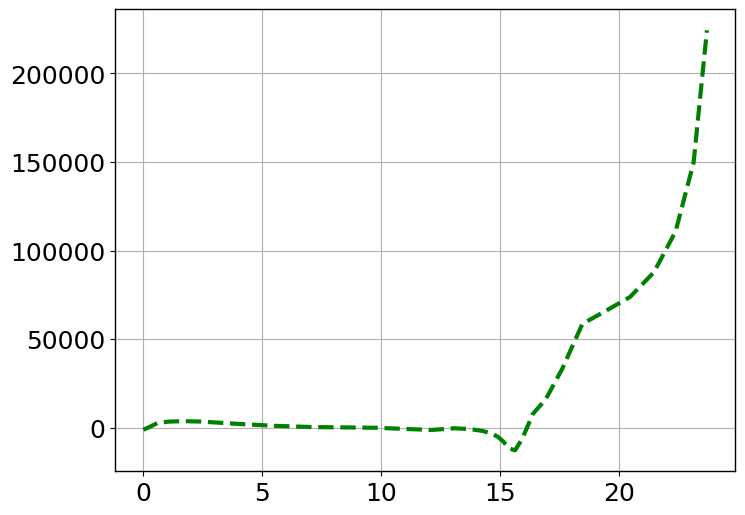

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(profile['Spar'], para_neut_tot, label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'g', linestyle = '--')



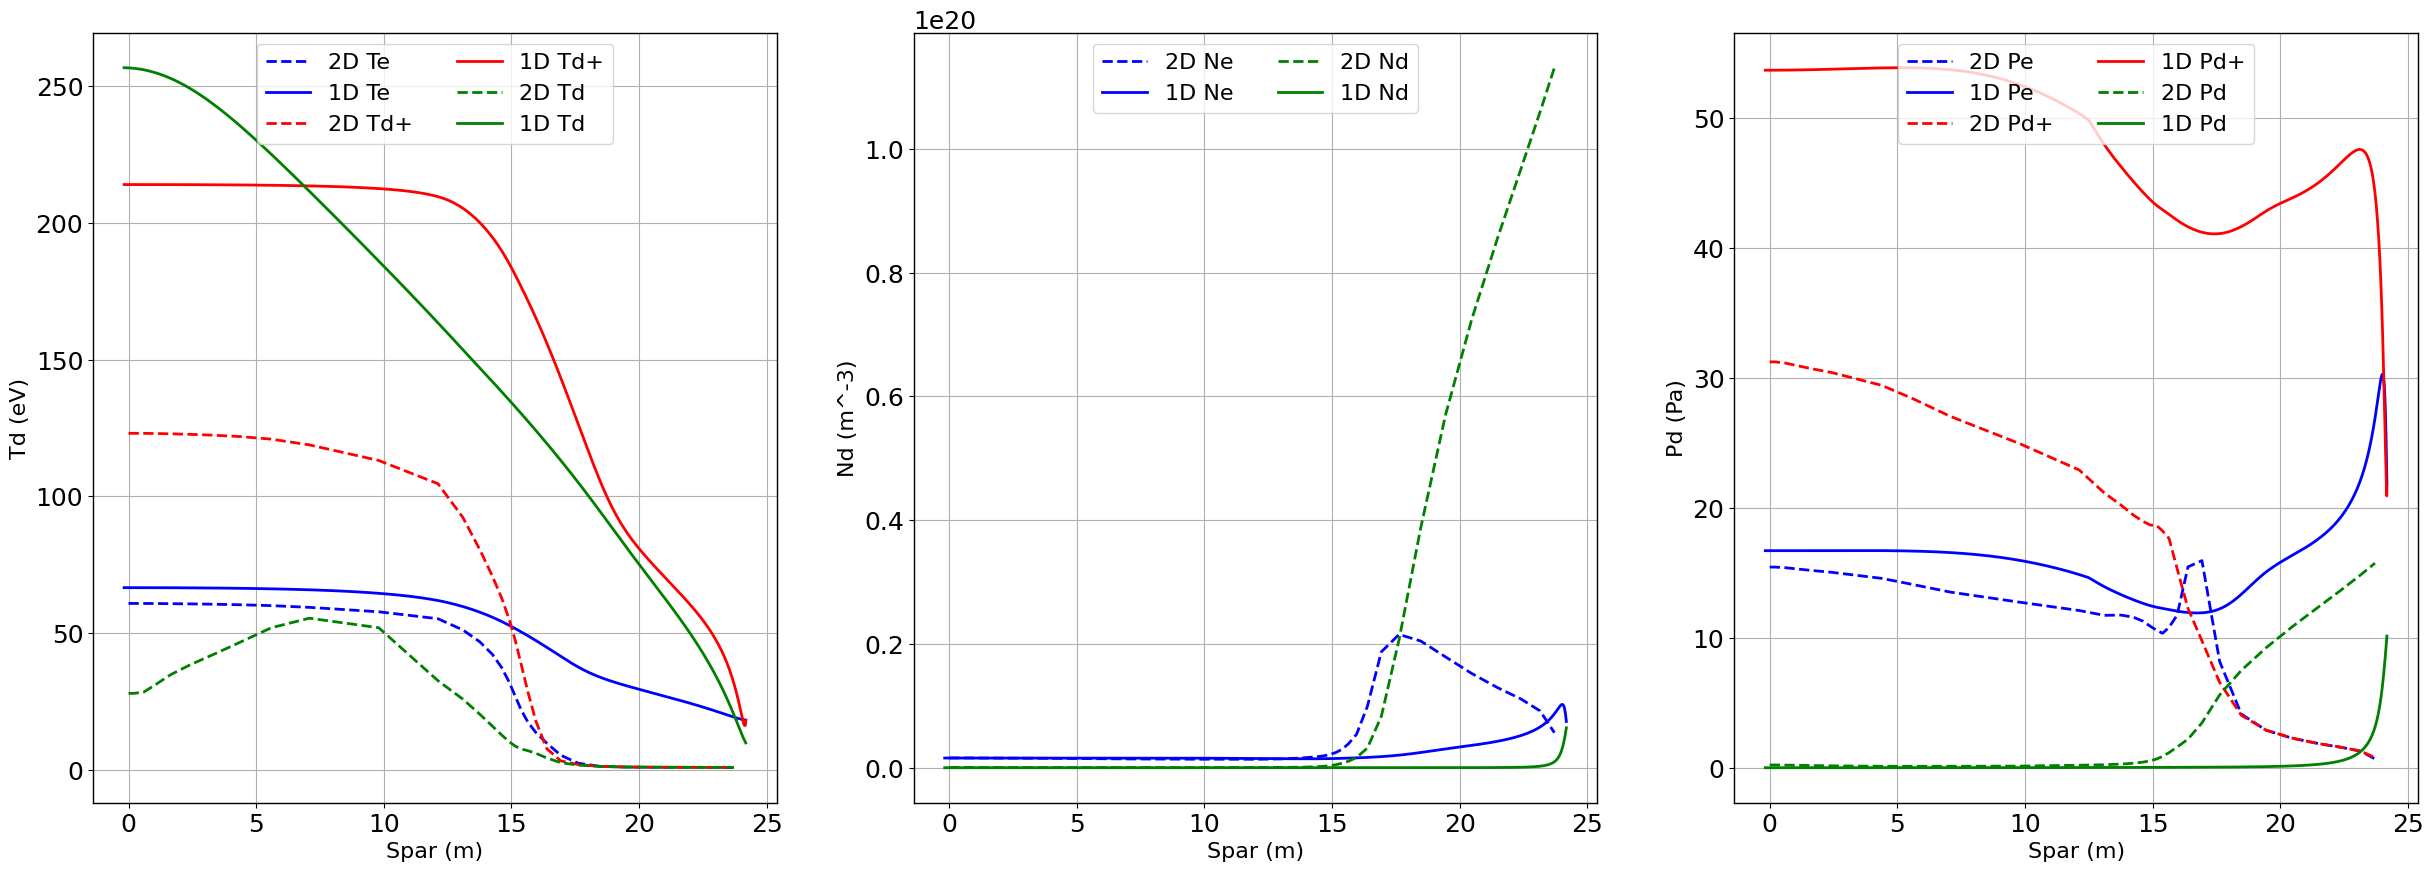

In [15]:

# def compare_1D_2D_profiles(case_2d, case_1d, params = ['Te', 'Td+', 'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd'], sepadd = 1, region = ('outer_lower')):

#     profile_2d = get_1d_poloidal_data(case_2d, params, region = region, sepadd = sepadd)

#     fig, ax = plt.subplots(1, 1, figsize = (12, 10))

#     for param in params:
#         ax.plot(profile_2d['Spar'], profile_2d[param], label = f'2D {param}', linewidth = linewidth, linestyle = '--')
#         ax.plot(case_1d['pos'], case_1d[param], label = f'1D {param}', linewidth = linewidth)

#     ax.legend(loc = 'upper right')
#     ax.set_xlabel('Spar (m)')
#     ax.set_ylabel('Parameter')
#     ax.set_title('Comparison of 1D and 2D profiles')

# compare_1D_2D_profiles(case_2d_geom, case_1d, params = ['Te', 'Td+', 'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd'], sepadd = 1, region = ('outer_lower'))


plot_params = [['Te', 'Td+', 'Td'], ['Ne', 'Nd'], ['Pe', 'Pd+', 'Pd']]
colors = ['b', 'r', 'g']

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax = ax.flatten()

for i, params in enumerate(plot_params):
    if i == 1:
        colors = colors = ['b', 'g']

    else:
        colors = ['b', 'r', 'g']
    for j, param in enumerate(params):

        # Assign colors using the index 'j' for each subplot's parameter
        ax[i].plot(profile['Spar'], profile[param], label=f'2D {param}', 
                   linewidth=2, linestyle='--', color=colors[j])
        ax[i].plot(case_1d['pos'], case_1d[param], label=f'1D {param}', 
                   linewidth=2, color=colors[j])
    ax[i].legend(ncols=2, loc='upper center')
    ax[i].set_xlabel('Spar (m)')
    ax[i].set_ylabel(f'{param} ({case.ds[param].units})')



# ax.plot(profile['Spar'], profile['Te'], label = '2D Te', linewidth = linewidth, color = 'b', linestyle = '--')
# ax.plot(profile['Spar'], profile['Td+'], label = '2D Td+', linewidth = linewidth, color = 'r', linestyle = '--')

# ax.plot(case_1d['pos'], case_1d['Te'], label = '1D Te', linewidth = linewidth, color = 'b')
# ax.plot(case_1d['pos'], case_1d['Td+'], label = '1D DTd+', linewidth = linewidth, color = 'r')


# ax.set_xlabel('Spar (m)')
# ax.set_ylabel('Temperature (eV)')

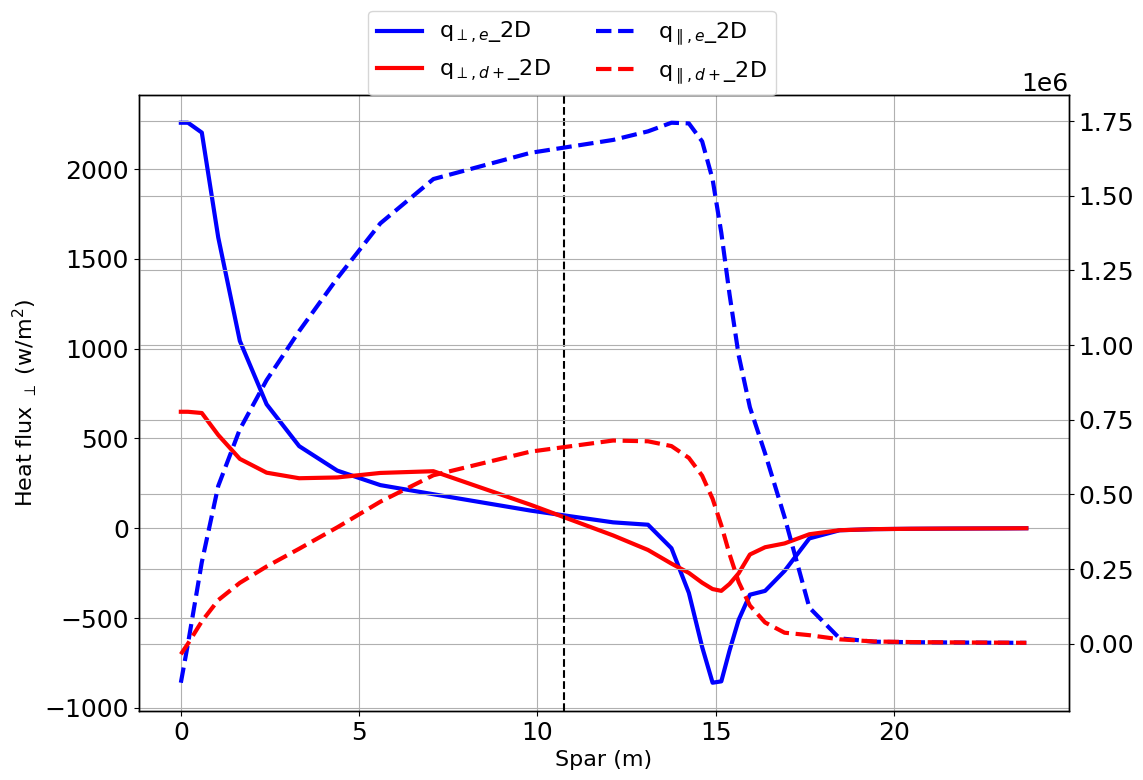

In [16]:
fig,ax = plt.subplots(1, 1, figsize = (12, 8))

ax2 = ax.twinx()

for i in ['e', 'd+']:
    # prallel heat flux
    profile[f'hflx{i}_tot_ylow'] = profile[f'ef{i}_tot_ylow']/da_yface

    # perpendicular heat flux
    profile_minus1[f'hflx{i}_tot_xlow'] = profile_minus1[f'ef{i}_tot_xlow']/da_xface
    profile[f'hflx{i}_tot_xlow'] = profile[f'ef{i}_tot_xlow']/da_xface
    profile_plus1[f'hflx{i}_tot_xlow'] = profile_plus1[f'ef{i}_tot_xlow']/da_xface

ax.plot(profile['Spar'], profile['hflxe_tot_xlow'] - profile_plus1['hflxe_tot_xlow'], label = r'q$_{\perp,e}$_2D', linewidth = linewidth, color = 'b')
ax.plot(profile['Spar'], profile['hflxd+_tot_xlow'] - profile_plus1['hflxd+_tot_xlow'], label = r'q$_{\perp,d+}$_2D', linewidth = linewidth, color = 'r')

ax2.plot(profile['Spar'], profile['hflxe_tot_ylow'], label = r'q$_{\parallel,e}$_2D', linewidth = linewidth, color = 'b', linestyle = '--')
ax2.plot(profile['Spar'], profile['hflxd+_tot_ylow'], label = r'q$_{\parallel,d+}$_2D', linewidth = linewidth, color = 'r', linestyle = '--')


ax.axvline(xpoint_loc, color = 'black', linestyle = '--')
ax.set_xlabel('Spar (m)')
ax.set_ylabel(r'Heat flux $_{\perp}$ (w/m$^2$)')
fig.legend(ncols = 2, loc = 'upper center')

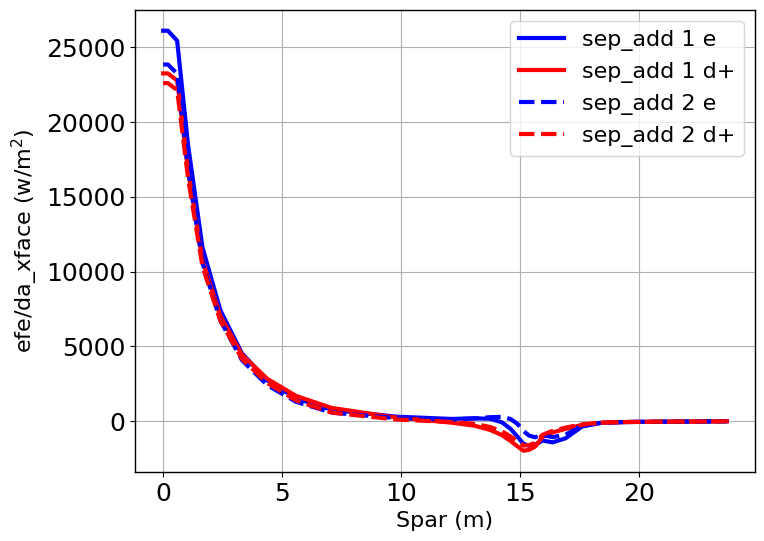

In [17]:
fig,ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(profile['Spar'], profile['hflxe_tot_xlow'], label = 'sep_add 1 e', linewidth = linewidth, color = 'b')
ax.plot(profile['Spar'], profile['hflxd+_tot_xlow'], label = 'sep_add 1 d+', linewidth = linewidth, color = 'r')

ax.plot(profile['Spar'], profile_plus1['hflxe_tot_xlow'], label = 'sep_add 2 e', linewidth = linewidth, linestyle = '--', color = 'b')
ax.plot(profile['Spar'], profile_plus1['hflxd+_tot_xlow'], label = 'sep_add 2 d+', linewidth = linewidth, linestyle = '--', color = 'r')

ax.set_xlabel('Spar (m)')
ax.set_ylabel(r'efe/da_xface (w/m$^2$)')
ax.legend()

# ax.set_yscale('log')

## Energy loss terms

1 None


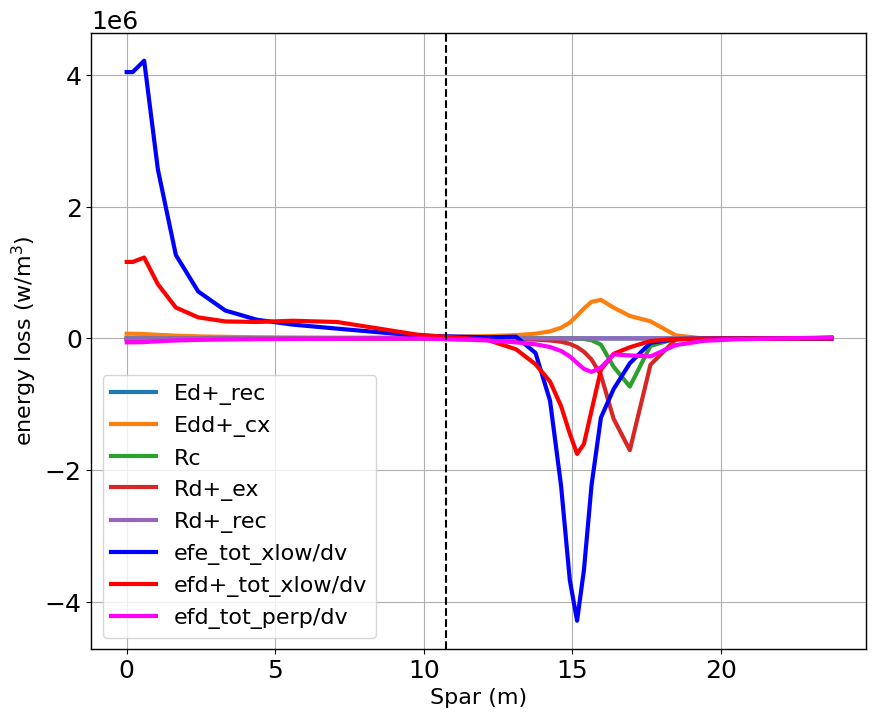

In [18]:
plasma_loss_terms = ['Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec' ]

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

profile_geom =  get_1d_poloidal_data(case.ds.isel(t=-1), params = ['Z', 'dx', 'dy', 'dz', 'J', 'dv'], region = ('outer_lower'), sepadd = 1)


cross_field_loss_neut_adv = (((profile['efd_adv_perp_ylow']+profile['efd_adv_perp_xlow']) - 
                         (profile_plus1['efd_adv_perp_ylow']+profile_plus1['efd_adv_perp_xlow']))/dv)

cross_field_loss_neut_cond = (((profile['efd_cond_perp_ylow']+profile['efd_cond_perp_xlow']) -
                        (profile_plus1['efd_cond_perp_ylow']+profile_plus1['efd_cond_perp_xlow']))/dv)

cross_field_loss_neut_total = cross_field_loss_neut_adv + cross_field_loss_neut_cond

cross_field_loss_e = (profile['efe_tot_xlow'] - profile_plus1['efe_tot_xlow'])/dv
cross_field_loss_i = (profile['efd+_tot_xlow'] - profile_plus1['efd+_tot_xlow'])/dv

for term in plasma_loss_terms:
    ax.plot(profile['Spar'], profile[term], label = term, linewidth = linewidth)


ax.plot(profile['Spar'], cross_field_loss_e, label = 'efe_tot_xlow/dv', linewidth = linewidth, color = 'b')
ax.plot(profile['Spar'], cross_field_loss_i, label = 'efd+_tot_xlow/dv', linewidth = linewidth, color = 'r')
ax.plot(profile['Spar'], cross_field_loss_neut_total, label = 'efd_tot_perp/dv', linewidth = linewidth, color = 'magenta')


ax.axvline(xpoint_loc, color = 'black', linestyle = '--')

ax.set_xlabel('Spar (m)')
ax.set_ylabel('energy loss (w/m$^3$)')
# ax.set_yscale('log')
ax.legend()

# Particle source

Text(0, 0.5, 'density source$_\\parallel$ (s$^{-1}$)')

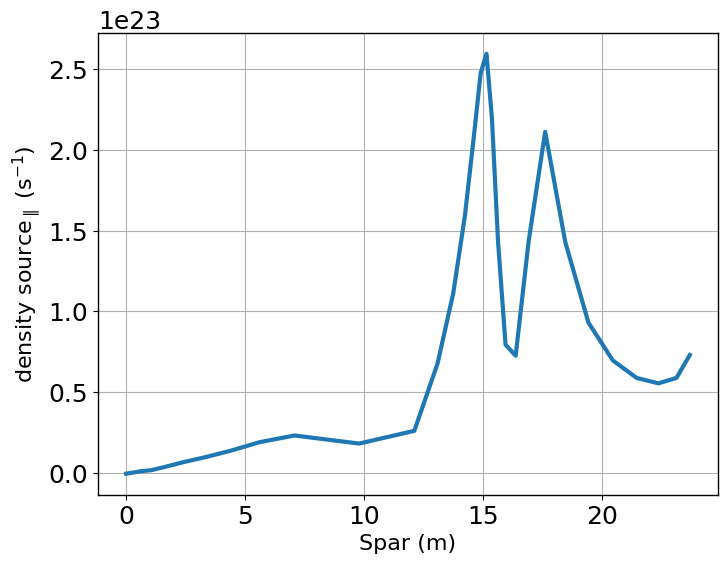

In [19]:
for i in ['d+']:
    profile[f'ps{i}_tot_ylow'] = profile[f'pf{i}_tot_ylow']/profile['dv']
    profile[f'ps{i}_tot_xlow'] = profile[f'pf{i}_tot_xlow']/profile['dv']
    profile_plus1[f'ps{i}_tot_xlow'] = profile_plus1[f'pf{i}_tot_xlow']/profile_plus1['dv']



fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(profile['Spar'], profile['psd+_tot_ylow'], label = 'Y low', linewidth = linewidth)
ax.set_xlabel('Spar (m)')
ax.set_ylabel(r'density source$_\parallel$ (s$^{-1}$)')

KeyError: 'Sd+_sheath'

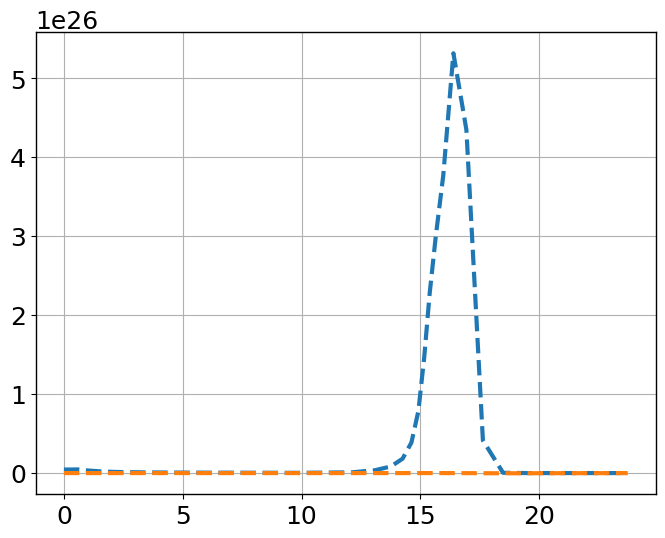

In [20]:
ion_terms_2d = ['Sd+_iz', 'Sd+_rec', 'Sd+_sheath']
ion_terms_1d = ['Sd+_iz', 'Sd+_rec']


neut_terms_2d = ['Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle']
neut_terms_1d = ['Sd_target_recycle']



fig, ax = plt.subplots(1, 1, figsize = (8, 6))

for term in ion_terms_2d:
    ax.plot(profile['Spar'], profile[term]/profile['dv'], label = f'2D {term}', linewidth = linewidth, linestyle = '--')

for term in ion_terms_1d:
    ax.plot(case_1d['pos'], case_1d[term]/case_1d['dv'], label = f'1D {term}', linewidth = linewidth)

for term in neut_terms_2d:
    ax.plot(profile['Spar'], profile[term]/profile['dv'], label = f'2D {term}', linewidth = linewidth, linestyle = '--')

for term in neut_terms_1d:
    ax.plot(case_1d['pos'], case_1d[term]/case_1d['dv'], label = f'1D {term}', linewidth = linewidth)

ax.legend()
ax.axvline(xpoint_loc, color = 'black', linestyle = '--')

In [ ]:
fig,ax = plt.subplots(1, 1, figsize = (8, 6))


cross_field_ploss_d_1 = (profile['pfd_adv_perp_xlow'] + profile['pfd_adv_perp_ylow'])/dv
                     
cross_field_ploss_d_2 = (profile_plus1['pfd_adv_perp_xlow']+profile_plus1['pfd_adv_perp_ylow'])/dv

ax.plot(profile['Spar'], cross_field_ploss_d_1, label = 'd_tot_xlow_1', linewidth = linewidth, color = 'g', linestyle = '--')
ax.plot(profile['Spar'], cross_field_ploss_d_2, label = 'd_tot_xlow_2', linewidth = linewidth, color = 'g')

ax.legend()

# flux tube analysis

## Power losses

0 None
Parameter Sd+_sheath not found
1 None
Parameter Sd+_sheath not found
1 None
Parameter Sd+_sheath not found
2 None
Parameter Sd+_sheath not found
2 None
Parameter Sd+_sheath not found
3 None
Parameter Sd+_sheath not found
3 None
Parameter Sd+_sheath not found
4 None
Parameter Sd+_sheath not found
4 None
Parameter Sd+_sheath not found
5 None
Parameter Sd+_sheath not found
5 None
Parameter Sd+_sheath not found
6 None
Parameter Sd+_sheath not found
6 None
Parameter Sd+_sheath not found
7 None
Parameter Sd+_sheath not found
7 None
Parameter Sd+_sheath not found
8 None
Parameter Sd+_sheath not found
8 None
Parameter Sd+_sheath not found
9 None
Parameter Sd+_sheath not found
9 None
Parameter Sd+_sheath not found
10 None
Parameter Sd+_sheath not found
10 None
Parameter Sd+_sheath not found
11 None
Parameter Sd+_sheath not found


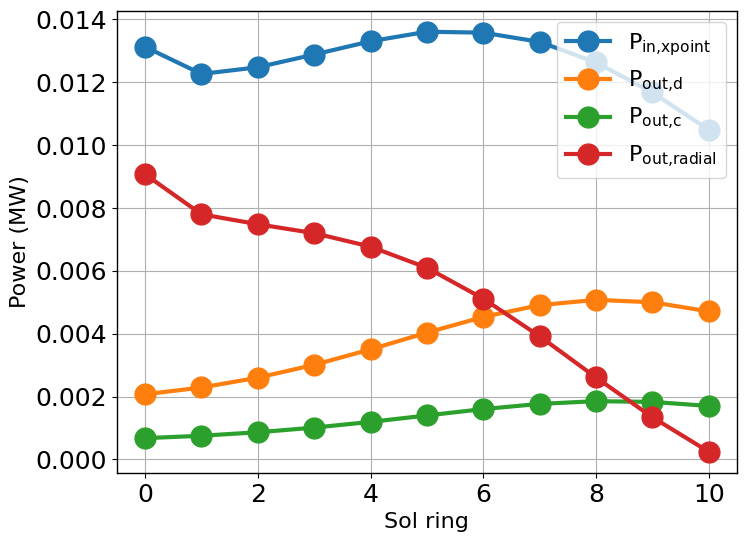

In [21]:
params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd+_sheath', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle']




power_in = []
power_out_H = []
power_out_c = []
power_out_radial = []
sol_rings = [0, 1, 2, 3, 4, 5, 6, 7,8 ,9, 10]
for i in sol_rings:
    profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = i)
    profile_plus1 = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = i+1)
    xpoint_ind = np.argmin(profile['R'])

    # parallel power
    power_in.append((profile['efe_tot_ylow'][xpoint_ind] + profile['efd+_tot_ylow'][xpoint_ind])*1e-6)

    power_out_H.append(np.sum(profile['Rd+_ex']*profile['dv'])*-1e-6)
    power_out_c.append(np.sum(profile['Rc']*profile['dv'])*-1e-6)

    power_out = (profile['efe_tot_xlow'][xpoint_ind:-2] + profile['efd+_tot_xlow'][xpoint_ind:-2])
    power_out_plus1 = (profile_plus1['efe_tot_xlow'][xpoint_ind:-2] + profile_plus1['efd+_tot_xlow'][xpoint_ind:-2])

    power_out_radial.append(np.sum((power_out - power_out_plus1)*-1e-6))

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(sol_rings, power_in, label = r'P$_\text{in,xpoint}$', linewidth = linewidth, marker = 'o', markersize = markersize)
ax.plot(sol_rings, power_out_H, label = r'P$_\text{out,d}$', linewidth = linewidth, marker='o', markersize = markersize)
ax.plot(sol_rings, power_out_c, label = r'P$_\text{out,c}$', linewidth = linewidth, marker='o', markersize = markersize)
ax.plot(sol_rings, power_out_radial, label = r'P$_\text{out,radial}$', linewidth = linewidth, marker='o', markersize = markersize)

ax.set_xlabel('Sol ring')
ax.set_ylabel('Power (MW)')
ax.legend()

## Particle losses

In [ ]:
params = ['R', 'Bxy', 'efd+_cond_ylow', 'efd+_kin_ylow', 'efd+_tot_xlow', 'efd+_tot_ylow', 
          'efe_cond_ylow' , 'efe_kin_ylow', 'efe_tot_ylow', 'kappa_par_e', 'Te', 
          'efd+_tot_xlow','efe_tot_xlow', 'J', 'g_22', 'dx', 'dy','dz', 'Td+', 'dr', 
          'dl', 'dv', 'SNd+', 'SNd','pfd+_tot_xlow', 'pfd+_tot_ylow', 'Ed+_iz', 'Sd+_rec',
          'Ed+_rec', 'Edd+_cx', 'Rc', 'Rd+_ex', 'Rd+_rec', 
          'efd_adv_par_ylow', 'efd_adv_perp_xlow','efd_adv_perp_ylow' , 
          'efd_cond_par_ylow', 'efd_cond_perp_xlow', 'efd_cond_perp_ylow',
          'pfd_adv_par_ylow', 'pfd_adv_perp_xlow', 'pfd_adv_perp_ylow', 
          'Td', 'Ne', 'Nd', 'Pe', 'Pd+', 'Pd',
          'Sd+_iz', 'Sd+_rec', 'Sd+_sheath', 'Sd_pump', 'Sd_target_recycle', 'Sd_wall_recycle']




particle_in_xpoint = []
particle_in_iz = []
particle_out_radial_d = []
particle_out_radial_i = []
particle_recycling = []
sol_rings = [0, 1, 2, 3, 4, 5, 6, 7,8 ,9, 10]

for i in sol_rings:
    profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = i)
    profile_plus1 = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = i+1)
    xpoint_ind = np.argmin(profile['R'])

    # particle_in_xpoint.append(profile['pfd_adv_par_ylow'][xpoint_ind] + profile['pfd_adv_perp_ylow'][xpoint_ind])

    particle_in_xpoint.append((profile['pfd+_tot_ylow'][xpoint_ind]))
    particle_recycling.append(sum(profile['Sd_target_recycle']))

    particle_in_iz.append(np.sum(profile['Sd+_iz'][xpoint_ind:]*profile['dv']))

    particle_out_radial_i.append(np.sum((profile['pfd+_tot_xlow'] - profile_plus1['pfd+_tot_xlow'])*-1))
    
    particle_out_radial_d.append(np.sum((profile['pfd_adv_perp_xlow'] - profile_plus1['pfd_adv_perp_xlow'])))


fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(sol_rings, particle_in_xpoint, label = r'P$_\text{in,xpoint}$', linewidth = linewidth, marker = 'o', markersize = markersize)
# ax.plot(sol_rings, particle_recycling, label = r'P$_\text{in,recycling}$', linewidth = linewidth, marker='o', markersize = markersize)
ax.plot(sol_rings, particle_in_iz, label = r'P$_\text{in,ionisation}$', linewidth = linewidth, marker='o', markersize = markersize)
# ax.plot(sol_rings, particle_out_radial_d, label = r'P$_\text{out,c}$', linewidth = linewidth, marker='o', markersize = markersize)
ax.plot(sol_rings, particle_out_radial_i, label = r'P$_\text{out,radial}$', linewidth = linewidth, marker='o', markersize = markersize)

ax.legend()
ax.set_xlabel('Sol ring')
ax.set_ylabel('Particles (s$^{-1}$)')


In [ ]:
fig,ax = plt.subplots(1, 1, figsize = (8, 6))
ax2 = ax.twinx()
sol_rings = [1,2]

colors = ['b', 'r', 'g', 'm', 'c', 'y', 'k', 'orange', 'purple', 'brown', 'pink']

colors = colors[:len(sol_rings)]

for value, i in enumerate(sol_rings):


    profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = i)
    profile_plus1 = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = params, region = ('outer_lower'), sepadd = i+1)
    power_flow = (profile['efe_tot_xlow'] + profile['efd+_tot_xlow']) - (profile_plus1['efe_tot_xlow'] + profile_plus1['efd+_tot_xlow'])*1e-6
    ax.plot(profile['Spar'], power_flow, label = f'sol_ring_{i}', linewidth = linewidth, color = colors[value])

    ax2.plot(profile['Spar'], profile['efe_tot_ylow'] + profile['efd+_tot_ylow'], label = f'sol_ring_{i}', linewidth = linewidth, color = colors[value], linestyle = '--')

        # ax.plot(profile['Spar'], profile['efe_tot_xlow'] + profile['efd+_tot_xlow'], label = f'sol_ring_{i}', linewidth = linewidth)

ax.axvline(xpoint_loc, color = 'black', linestyle = '--')
ax2.set_ylabel('ef_tot_ylow (MW)')
ax.set_xlabel('Spar (m)')
ax.set_ylabel('ef_tot_xlow (MW)')

ax.legend()